In [1]:
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from keras.layers.experimental.preprocessing import TextVectorization
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Bidirectional, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt



In [2]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [3]:
texts=[]
labels=[]

for example, label in train_dataset:
    texts.append(example.numpy())
    labels.append(label.numpy())
    


In [4]:
train_df = pd.DataFrame(data = {'text': texts, 'label' : labels})

In [5]:
train_df.head(10)

,text,label
0,"b""This was an absolutely terrible movie. Don't...",0
1,b'I have been known to fall asleep during film...,0
2,b'Mann photographs the Alberta Rocky Mountains...,0
3,b'This is the kind of film for a snowy Sunday ...,1
4,"b'As others have mentioned, all the women that...",1
5,"b""This is a film which should be seen by anybo...",1
6,"b'Okay, you have:<br /><br />Penelope Keith as...",0
7,b'The film is based on a genuine 1950s novel.<...,0
8,b'I really love the sexy action and sci-fi fil...,0
9,"b'Sure, this one isn\'t really a blockbuster, ...",0


In [6]:
test_texts=[]
test_labels=[]

for example, label in test_dataset:
    test_texts.append(example.numpy())
    test_labels.append(label.numpy())
    

In [7]:
test_df = pd.DataFrame(data = {'text' : test_texts, 'label' : test_labels})

In [8]:
test_df.head(10)

,text,label
0,"b""There are films that make careers. For Georg...",1
1,"b""A blackly comic tale of a down-trodden pries...",1
2,"b'Scary Movie 1-4, Epic Movie, Date Movie, Mee...",0
3,b'Poor Shirley MacLaine tries hard to lend som...,0
4,b'As a former Erasmus student I enjoyed this f...,1
5,"b""My God, Ryan Gosling has made a lot of deep ...",1
6,"b""This film just won the best film award at th...",1
7,b'The cast for this production of Rigoletto is...,1
8,b'As long as you keep in mind that the product...,0
9,"b""Every great once in a while, you stumble upo...",1


In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [10]:
encoder = TextVectorization(max_tokens = 1000)

encoder.adapt(train_dataset.map(lambda text, label: text))

In [11]:
vocab = np.array(encoder.get_vocabulary())

vocab

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but',
       'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be',
       'one', 'its', 'at', 'all', 'by', 'an', 'they', 'from', 'who', 'so',
       'like', 'her', 'just', 'or', 'about', 'has', 'if', 'out', 'some',
       'there', 'what', 'good', 'when', 'more', 'very', 'even', 'she',
       'my', 'no', 'up', 'would', 'which', 'only', 'time', 'really',
       'story', 'their', 'were', 'had', 'see', 'can', 'me', 'than', 'we',
       'much', 'well', 'been', 'get', 'will', 'into', 'also', 'because',
       'other', 'do', 'people', 'bad', 'great', 'first', 'how', 'most',
       'him', 'dont', 'made', 'then', 'movies', 'make', 'films', 'could',
       'way', 'them', 'any', 'too', 'after', 'characters', 'think',
       'watch', 'two', 'many', 'being', 'seen', 'character', 'never',
       'little', 'acting', 'where', 'plot', 'best', 'love', 'did'

In [12]:
model = Sequential()

model.add(encoder)
model.add(Embedding(len(vocab), 64, mask_zero = True))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))


In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

Epoch 1/10
391/391 [==============================] - 35s 90ms/step - loss: 0.5850 - accuracy: 0.6828 - val_loss: 0.4161 - val_accuracy: 0.8208
Epoch 2/10
391/391 [==============================] - 33s 83ms/step - loss: 0.4366 - accuracy: 0.8183 - val_loss: 0.3742 - val_accuracy: 0.8448
Epoch 3/10
391/391 [==============================] - 32s 83ms/step - loss: 0.5028 - accuracy: 0.7644 - val_loss: 0.4135 - val_accuracy: 0.8339
Epoch 4/10
391/391 [==============================] - 32s 82ms/step - loss: 0.3923 - accuracy: 0.8306 - val_loss: 0.3718 - val_accuracy: 0.8453
Epoch 5/10
391/391 [==============================] - 32s 83ms/step - loss: 0.3422 - accuracy: 0.8570 - val_loss: 0.3377 - val_accuracy: 0.8495
Epoch 6/10
391/391 [==============================] - 33s 85ms/step - loss: 0.3281 - accuracy: 0.8611 - val_loss: 0.3435 - val_accuracy: 0.8432
Epoch 7/10
391/391 [==============================] - 33s 84ms/step - loss: 0.3121 - accuracy: 0.8668 - val_loss: 0.3352 - val_accuracy:

In [19]:
def plotmodelhistory(history): 
  fig, axs = plt.subplots(1,2,figsize=(15,5)) 
  epochs = range(1, len(history.history['accuracy'])+1)

  axs[0].plot(epochs, history.history['accuracy'])
  axs[0].plot(epochs, history.history['val_accuracy'])
  axs[0].legend(['train', 'validate'], loc='upper left')
  axs[0].set_title('Model Accuracy')
  axs[0].set_ylabel('Accuracy') 
  axs[0].set_xlabel('Epoch')
    
  axs[1].plot(epochs, history.history['loss'])
  axs[1].plot(epochs, history.history['val_loss'])   
  axs[1].set_title('Model Loss')
  axs[1].set_ylabel('Loss') 
  axs[1].set_xlabel('Epoch')
  axs[1].legend(['train', 'validate'], loc='upper left')
  plt.show()

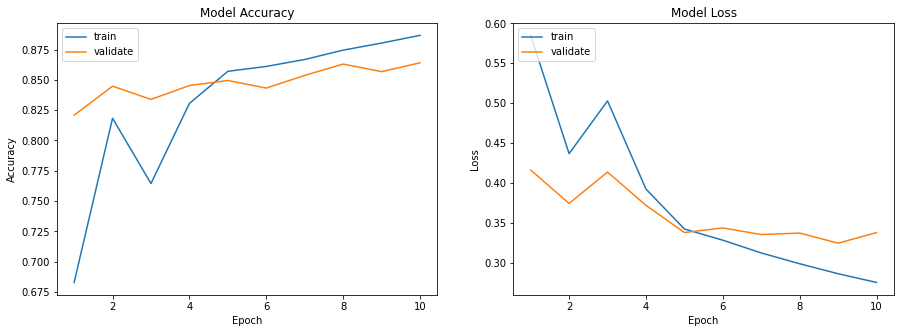

In [20]:
plotmodelhistory(history)